## Simulación Monte-Carlo

Federico Medina García Corral - A01721441 

Karen González Ugalde - A01411597

Ricardo de Jesús Balam Ek - A00831262

Eduardo Emiliano Porcayo Arrieta - A01423285

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import poisson
from scipy.stats import expon

In [5]:
datos1 = pd.read_csv("Datos_aseguradora.csv", encoding='latin-1')

In [6]:
#Leer el cvs y crear un dataframe
datos = pd.read_csv("Datos_aseguradora_limpia.csv", encoding='latin-1')

#Limpiar datos para poder utilizarlos en la simulacion
datos['Deducible'] = datos['Deducible'].fillna(0)
datos.drop(datos.loc[datos['Reclamo de no-Cobertura']=='Si'].index, inplace=True)
datos['Reclamo de no-Cobertura'] = datos['Reclamo de no-Cobertura'].replace(['No'], [1])
del datos["Modelo"]
datos

,Fecha del Siniestro,Tipo de auto,Monto del siniestro,Aplica cobertura,Deducible,Reclamo de no-Cobertura,Pérdida total
16,08/03/20,Subcompacto,17670,Si,2200.0,1,No
17,24/11/20,Camioneta,56280,Si,8000.0,1,No
18,04/09/20,Austero,6550,Si,1200.0,1,No
19,05/02/20,Subcompacto,11480,Si,2000.0,1,No
20,24/08/20,compacto,26000,Si,3700.0,1,No
...,...,...,...,...,...,...,...
27093,08/07/20,Subcompacto,10840,Si,2400.0,1,No
27094,23/12/20,De Lujo,42280,Si,5600.0,1,No
27095,10/08/20,Subcompacto,15700,Si,2600.0,1,No
27096,02/10/20,Austero,8730,Si,1800.0,1,No


In [7]:
datos.set_index(np.arange(0,25804), inplace=True)
datos.insert(7, "Monto menos Deducible", (datos["Monto del siniestro"]-datos["Deducible"]), True)
datos2 = datos.groupby(['Fecha del Siniestro']).sum()
datos2

,Monto del siniestro,Deducible,Reclamo de no-Cobertura,Monto menos Deducible
Fecha del Siniestro,,,,
01/01/20,2672680,319900.0,82,2352780.0
01/02/20,2399880,279500.0,72,2120380.0
01/03/20,2430930,292500.0,72,2138430.0
01/04/20,2635060,332200.0,83,2302860.0
01/05/20,2672620,323700.0,81,2348920.0
...,...,...,...,...
31/03/20,2045920,258800.0,69,1787120.0
31/05/20,3302980,402500.0,94,2900480.0
31/07/20,2297410,279600.0,69,2017810.0


In [15]:
# Entradas
simulaciones = 10000
dias_maximos = 5000

_lambda = 0
for i in range(len(datos2)):
    _lambda += datos2["Reclamo de no-Cobertura"][i] 
_lambda = _lambda/len(datos2) #parametro de poisson

miu = 0
for i in range(len(datos)):
    miu += datos["Monto del siniestro"][i]
miu = miu/len(datos) #parametro exponencial

ganancia_clientes = (30500/365)*len(datos1) #ganancia diaria por todos los clientes
ganancia_clientes

2266275.342465753

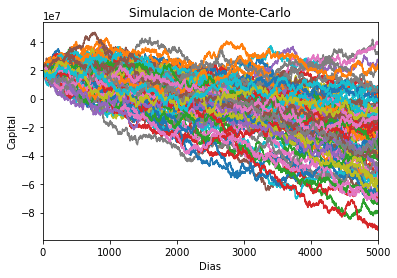

Numero de simulaciones que cayeron en ruina:  96
Promedio de tiempo t de ruina:  1774.0


In [16]:
capital_final = []
numero_ruinas = 0

plt.figure()
plt.title("Simulacion de Monte-Carlo")
plt.xlabel("Dias")
plt.ylabel("Capital")
plt.xlim([0, dias_maximos])

for i in range(simulaciones):
    dinero = [20000000]
    dias_trabajados = [0]
    dia_ruina = []
    while dias_trabajados[-1] < dias_maximos:
        n = int(poisson.rvs(_lambda))
        costos = sum([np.random.exponential(scale = miu) for r in range(n)])
        dinero.append(dinero[-1] + ganancia_clientes - costos)
        dias_trabajados.append(dias_trabajados[-1] + 1)
    for r in range(len(dinero)):
        if dinero[r] <= 0:
            numero_ruinas += 1
            dia_ruina.append(r)
            break
        
        
    capital_final.append(dinero[-1])
    plt.plot(dias_trabajados, dinero)
    
plt.show()
dia_ruina_cuando = sum(dia_ruina)/len(dia_ruina)

print("Numero de simulaciones que cayeron en ruina: ", numero_ruinas)
print("Promedio de tiempo t de ruina: ", dia_ruina_cuando)

In [17]:
valor_esperado = 1 / _lambda
print("La media es: ", valor_esperado)

valor_esperado_c = valor_esperado - valor_esperado / (len(datos2) - 1)
print("La media corregida es: ", valor_esperado_c)

La media es:  0.01414509378390947
La media corregida es:  0.014106233636151476


In [18]:
""" Maximum likelihood 95% confidence"""
_epsylon = valor_esperado_c * 1.96/(len(datos2)**0.5)
print("Lambda con intervalo de confianza: {0:8f} +/- {1:8f}".format(valor_esperado_c, _epsylon))
print("Intervalos de confianza: ({0:8f}, {1:9f})".format(valor_esperado_c - _epsylon, valor_esperado_c + _epsylon))
print("El error es de: {0:8f}".format(_epsylon))

Lambda con intervalo de confianza: 0.014106 +/- 0.001447
Intervalos de confianza: (0.012659,  0.015553)
El error es de: 0.001447


Con el error proporcionado a raíz del intervalo de confianza, no será necesario realizar una reducción de varianza, debido a que con esto se tiene un margen de error menor al 0.5%.